# Adult

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
adult: pd.DataFrame = pd.read_csv("adult.data", sep=', ', na_values='?')
adult.head()

C:\Users\VISION\AppData\Local\Temp\ipykernel_10656\3603023654.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  adult: pd.DataFrame = pd.read_csv("adult.data", sep=', ', na_values='?')


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Exploration

| class values

>50K, <=50K.

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [3]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### defining data types and drop duplicates

In [4]:
print("remove duplicated : ", adult.duplicated().sum())
adult.drop_duplicates(inplace=True)
adult.reset_index(inplace=True)

remove duplicated :  24


In [6]:
numerical: list[str] = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
categorical: list[str] = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']

In [7]:
adult[categorical] = adult[categorical].astype('category')
adult["target"] = (adult["target"] == ">50K").astype(int)
adult.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education-num        int64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
target               int32
dtype: object

### numerical exploration

In [7]:
adult[numerical].mode()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,36.0,123011,9.0,0.0,0.0,40.0
1,NaN,164190,NaN,NaN,NaN,NaN
2,NaN,203488,NaN,NaN,NaN,NaN


In [8]:
adult[numerical].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


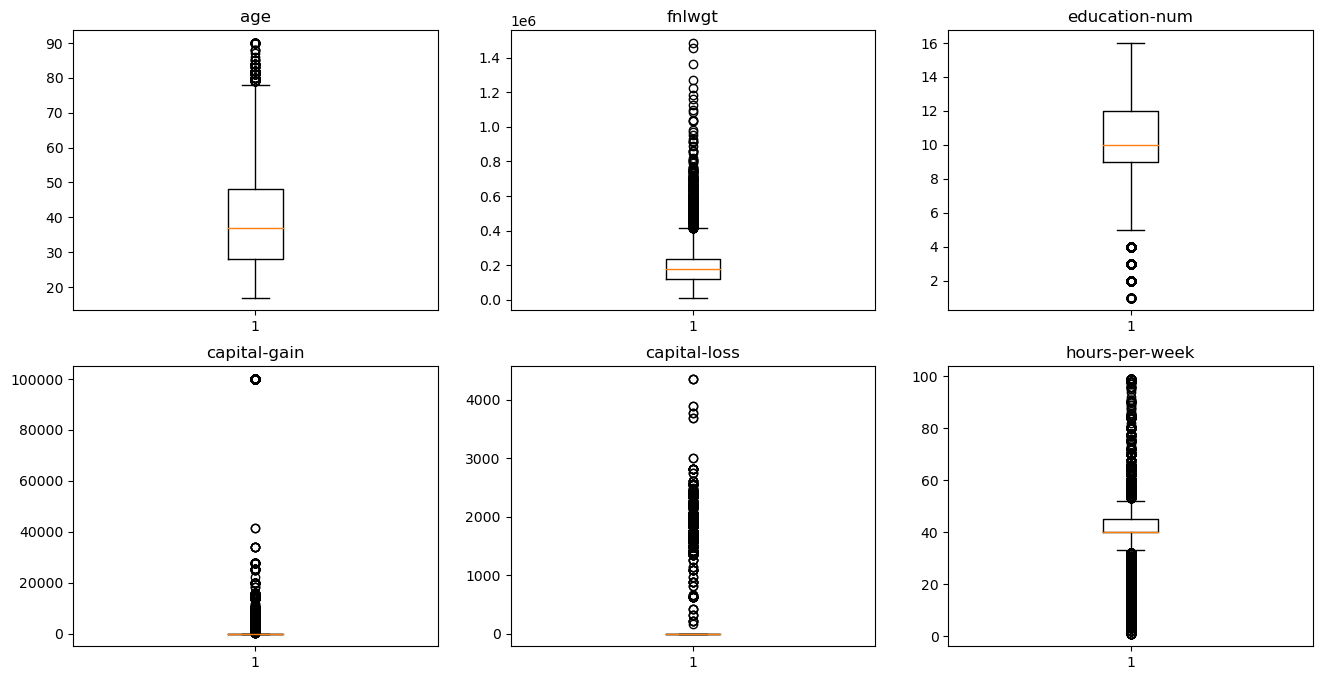

In [ ]:
_,axs = plt.subplots(2,3, figsize=(16,8))
for ax,column in zip(axs.flat, numerical):
    ax.boxplot(adult[column], )
    ax.set_title(column)
plt.title("boxplot for numerical features")
plt.show()

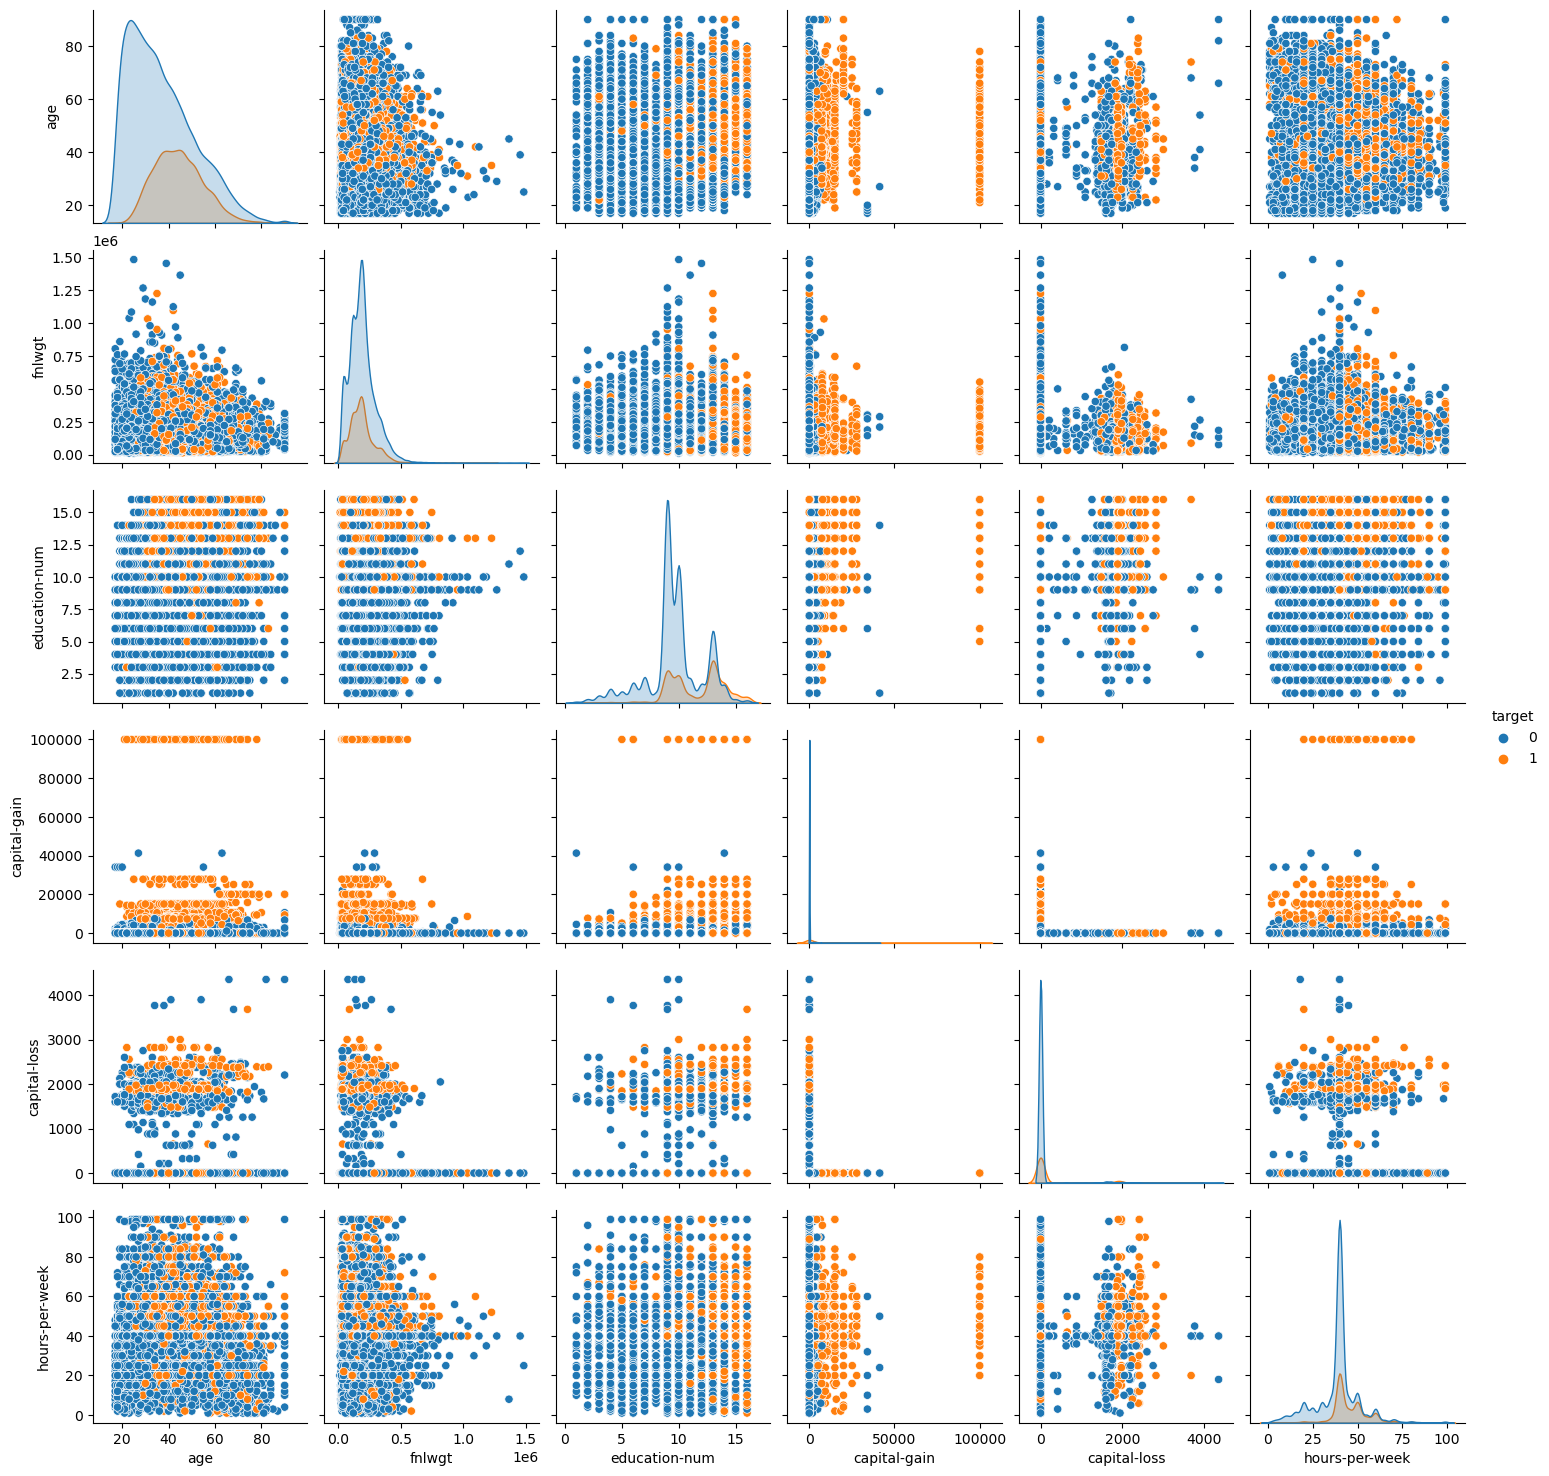

In [9]:
from seaborn import pairplot

pairplot(adult[numerical+["target"]], hue="target")

### categorical exploration

In [11]:
adult[categorical].describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
count,30725,32561,32561,30718,32561,32561,32561,31978
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22696,10501,14976,4140,13193,27816,21790,29170


### Pie charts for categorical features

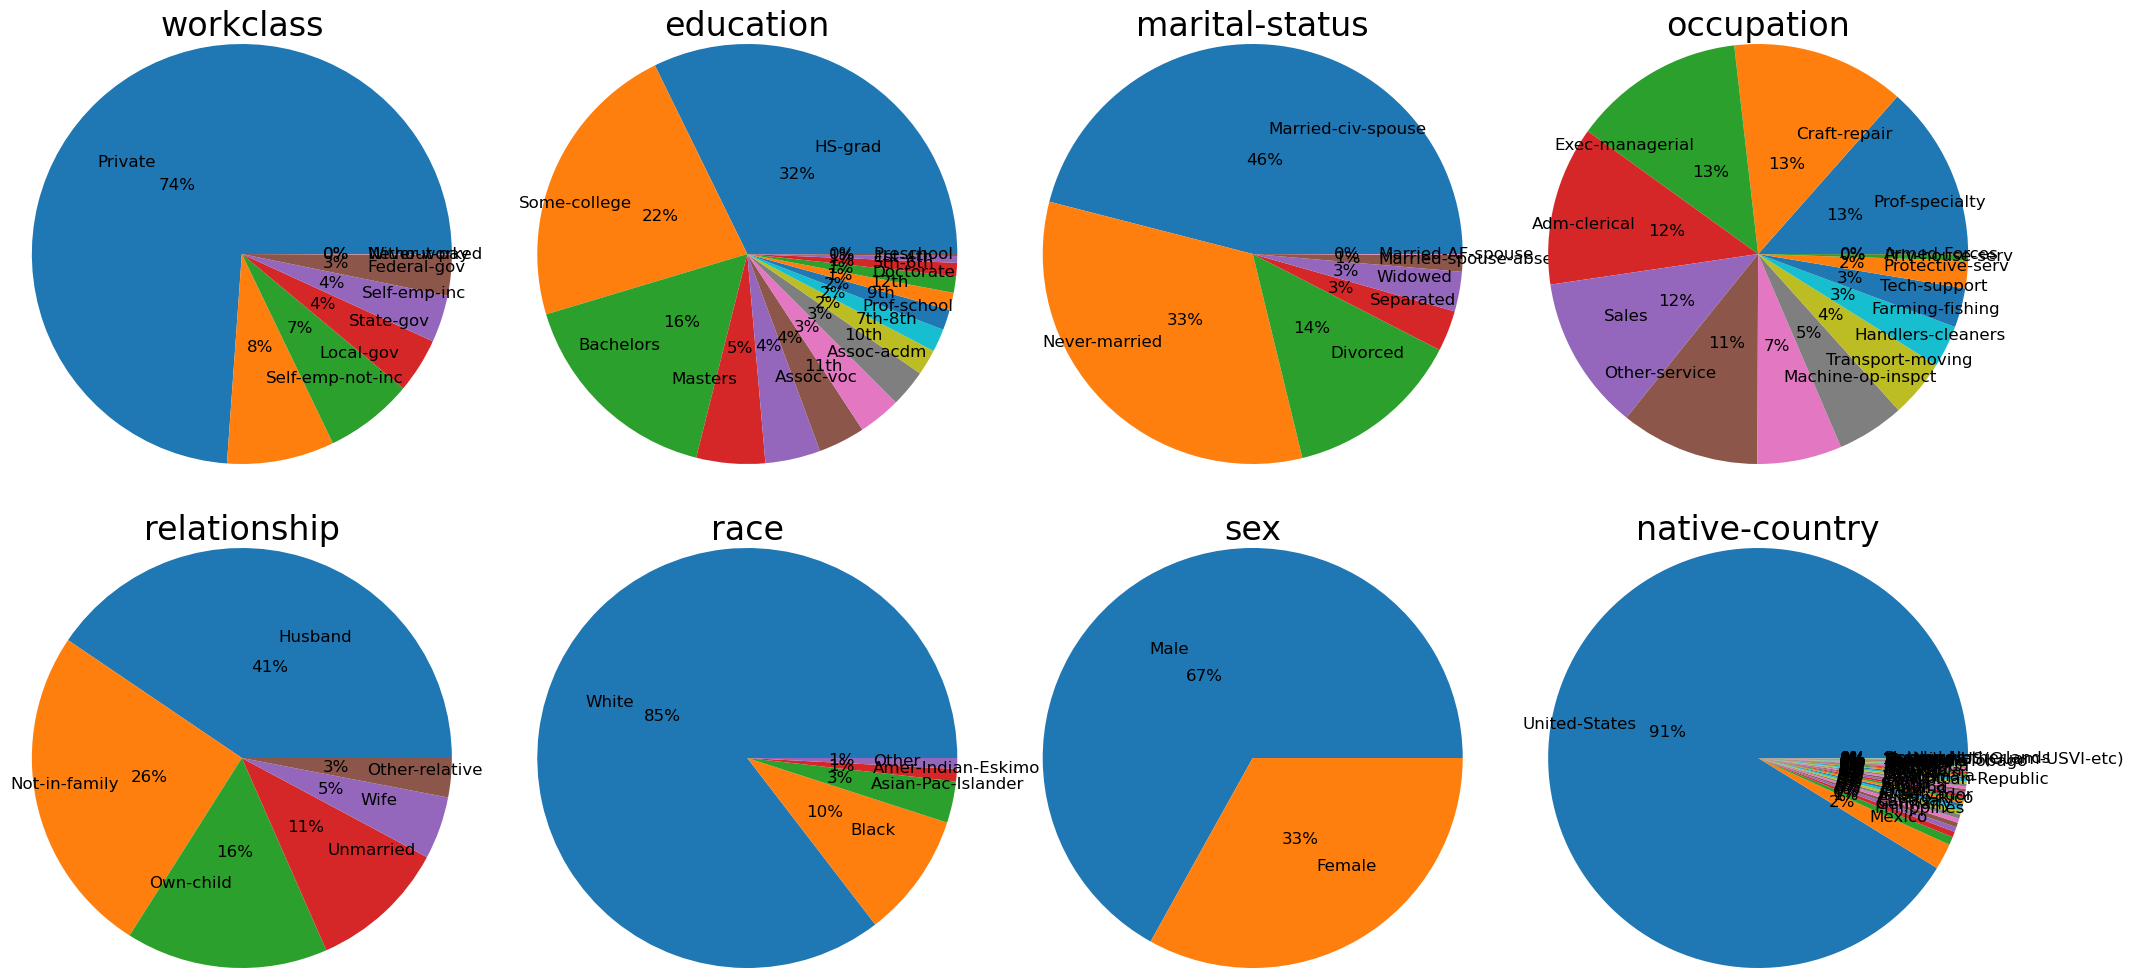

In [ ]:
_, axs = plt.subplots(2,4,figsize=(25, 12))
for ax,column in zip(axs.flat, categorical):
    _=adult[column].value_counts()
    ax.set_title(column, fontsize=24)
    ax.pie(_, labels=_.index, radius=1.25, labeldistance=0.6, pctdistance=0.45, autopct='%1.0f%%', textprops={"fontsize":12})
plt.show()

race and native-country have low entropy.

### histograms for all features

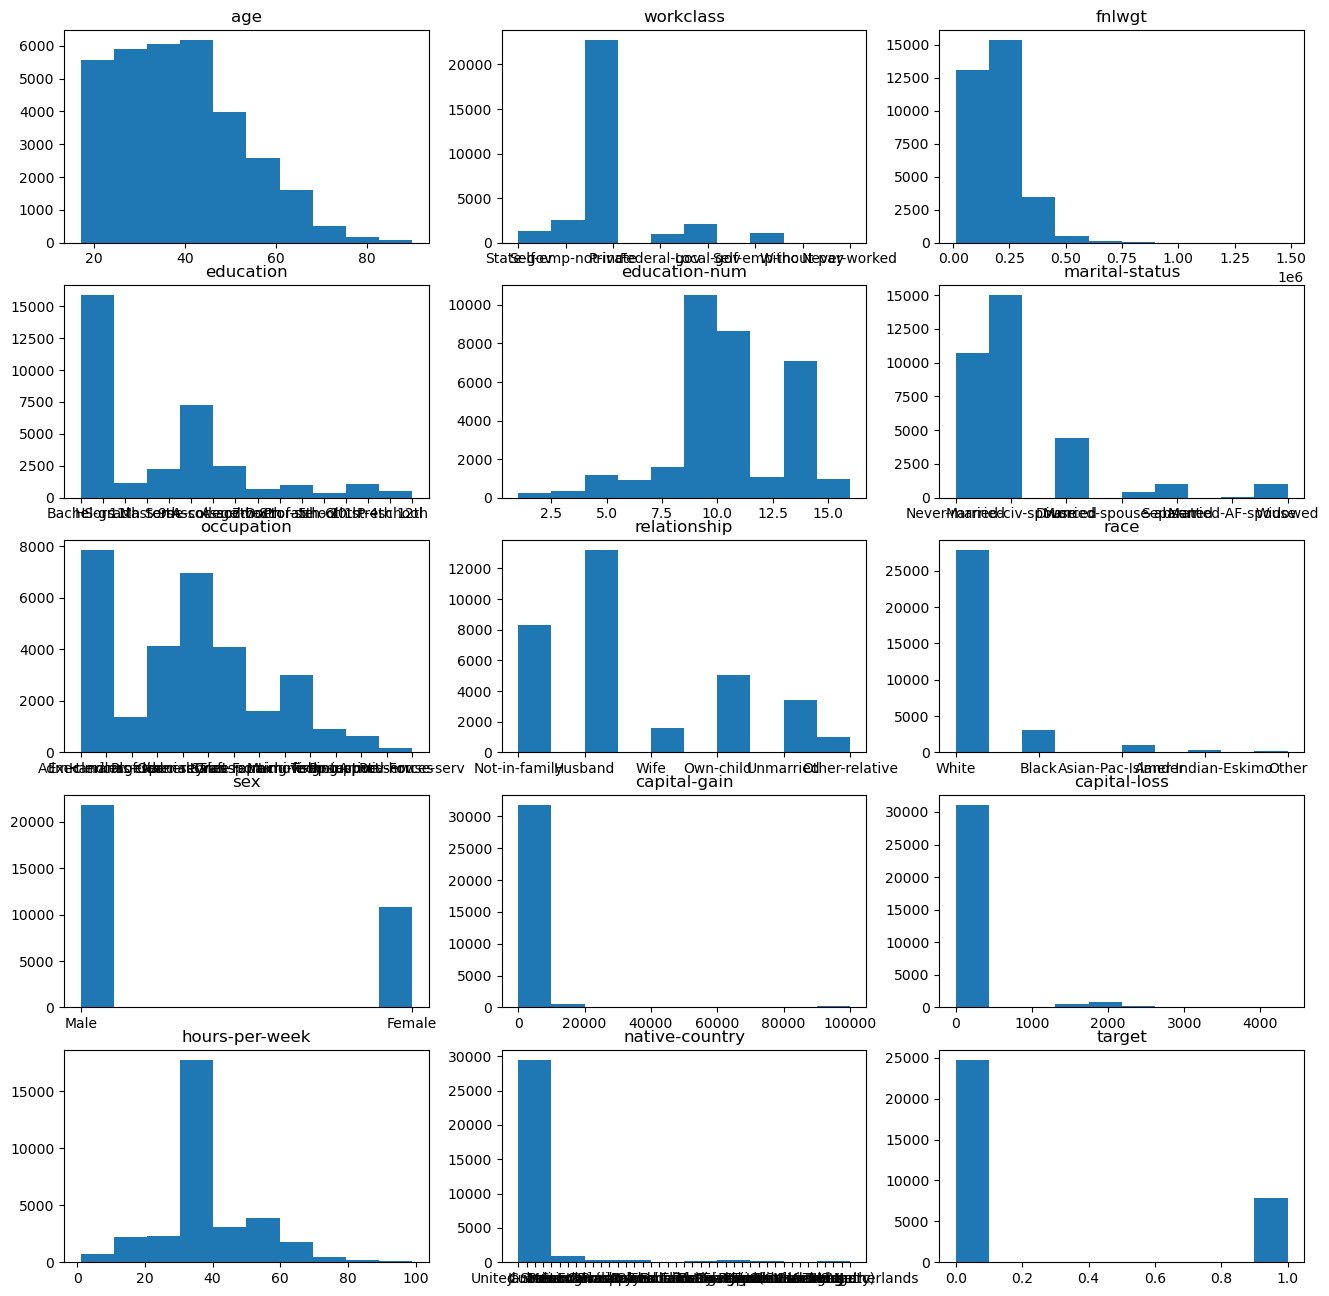

In [15]:
_,axs = plt.subplots(5,3, figsize=(16,16))
for ax,column in zip(axs.flat, adult.columns):
    ax.hist(adult[column].dropna())
    ax.set_title(column)
plt.show()

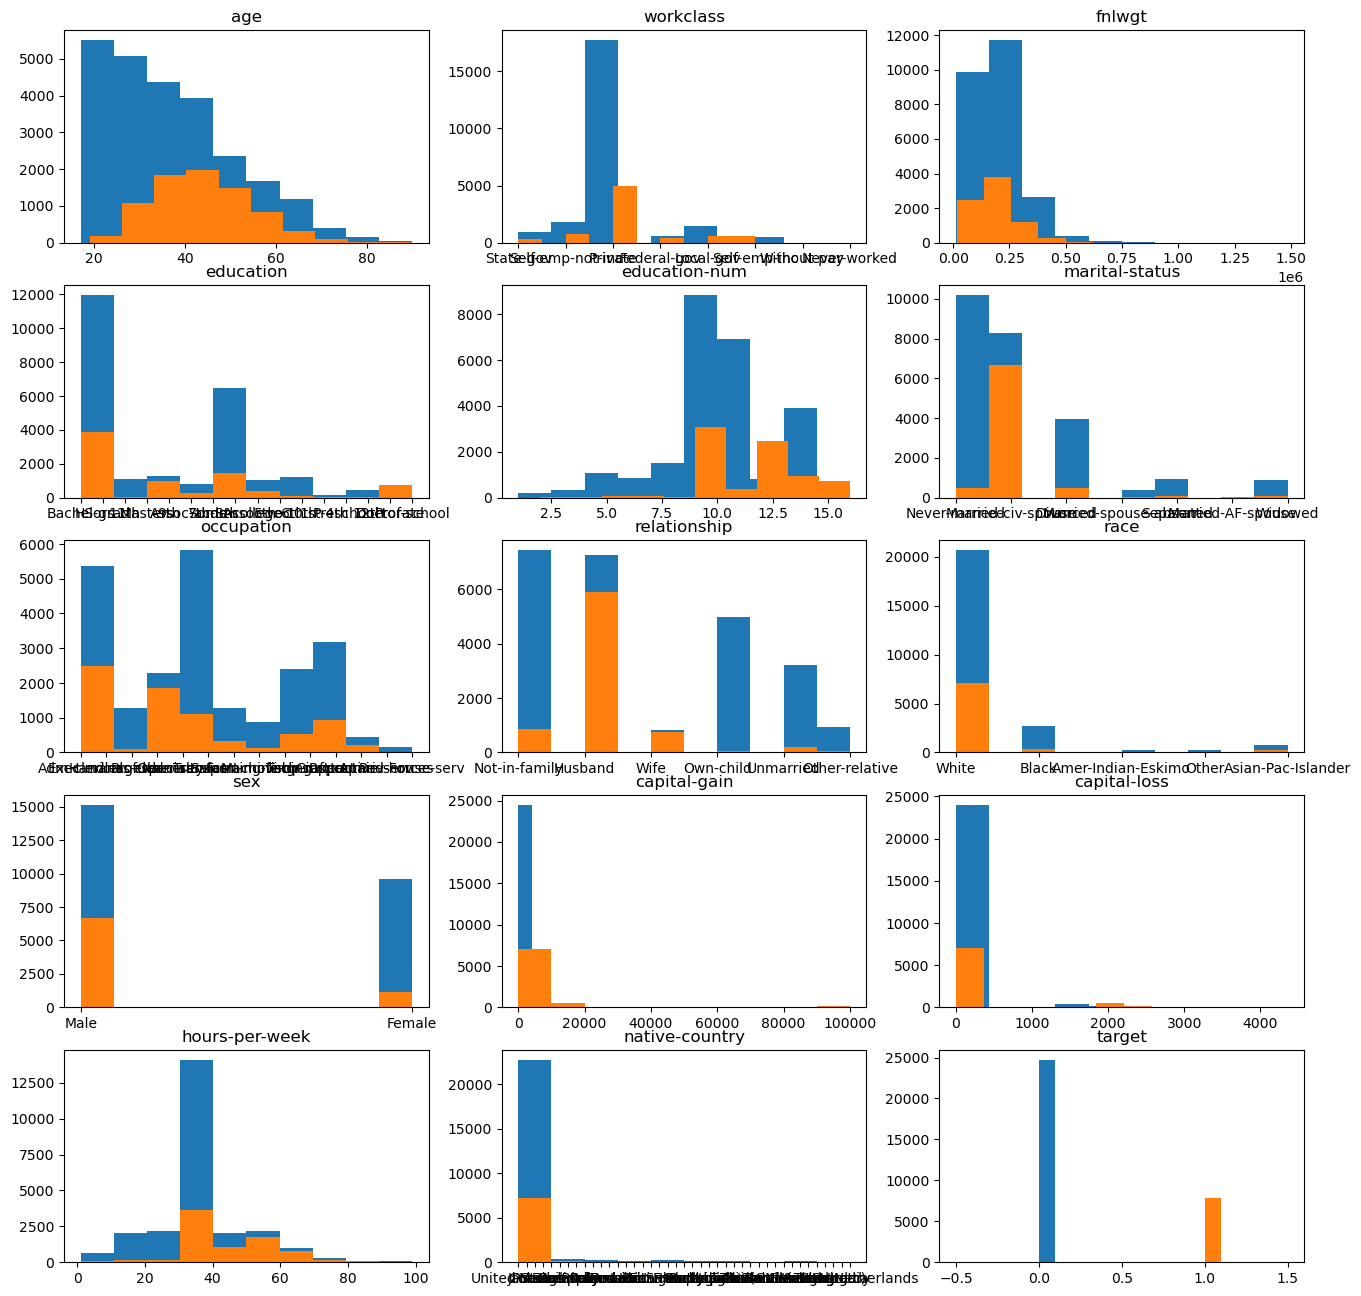

In [32]:
_,axs = plt.subplots(5,3, figsize=(16,16))
for ax,column in zip(axs.flat, adult.columns):
    ax.hist(adult.loc[adult["target"]==0 ,column].dropna())
    ax.hist(adult.loc[adult["target"]==1 ,column].dropna())
    ax.set_title(column)
plt.show()

## Preprocessing

### Fill nans
filling nan with most frequent: 
- 1   workclass       30725 non-null  object
- 6   occupation      30718 non-null  object
- 13  native-country  31978 non-null  object

In [9]:
adult.fillna(dict(adult[categorical].mode().iloc[0]), inplace=True)
adult.isna().sum().sum()

0

### numerical understanding

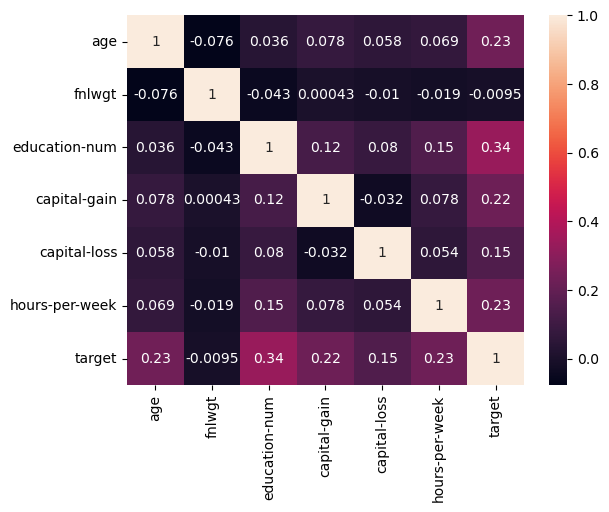

In [25]:
sns.heatmap(adult[numerical+["target"]].corr(), annot=True)
plt.show()

numerical features have low correlation with each other.    
the fnlwgt feature has low correlation with the target.

In [ ]:
adult[numerical].corrwith(adult["target"])

age               0.234037
fnlwgt           -0.009463
education-num     0.335154
capital-gain      0.223329
capital-loss      0.150526
hours-per-week    0.229689
dtype: float64

numerical unique values count

In [ ]:
for column in numerical:
    print(column, ": ",adult[column].unique().shape[0])

age :  73
fnlwgt :  21648
education-num :  16
capital-gain :  119
capital-loss :  92
hours-per-week :  94


capital-loss & capital-gain

In [34]:
adult[["capital-loss", "capital-gain"]].describe([0.916, 0.93, 0.95, 0.99])

,capital-loss,capital-gain
count,32537.000000,32537.000000
mean,87.368227,1078.443741
std,403.101833,7387.957424
min,0.000000,0.000000
50%,0.000000,0.000000
91.6%,0.000000,0.000000
93%,0.000000,2885.000000
95%,0.000000,5013.000000
99%,1980.000000,15024.000000
max,4356.000000,99999.000000


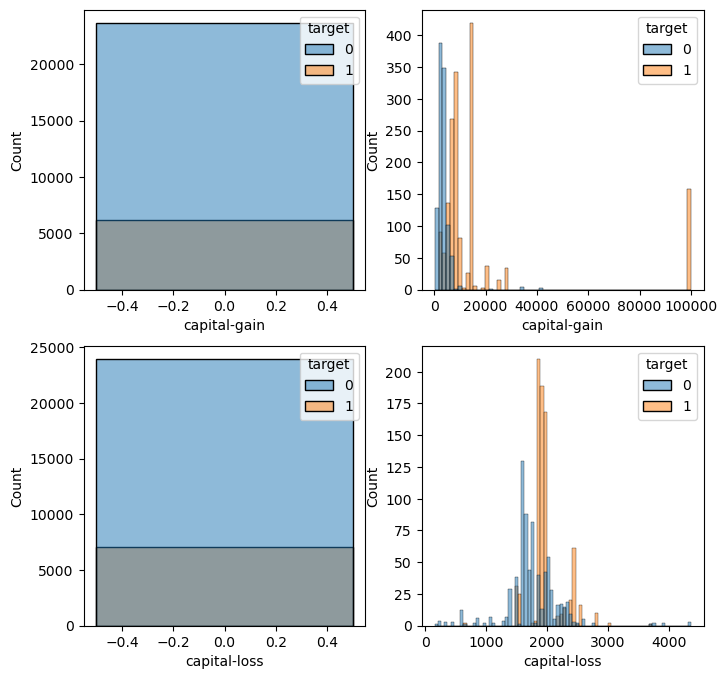

In [31]:
_,axs = plt.subplots(2,2, figsize=(8,8))
sns.histplot(adult[adult["capital-gain"]==0], x="capital-gain", hue="target", ax=axs[0,0])
sns.histplot(adult[adult["capital-gain"]!=0], x="capital-gain", hue="target", ax=axs[0,1])
sns.histplot(adult[adult["capital-loss"]==0], x="capital-loss", hue="target", ax=axs[1,0])
sns.histplot(adult[adult["capital-loss"]!=0], x="capital-loss", hue="target", ax=axs[1,1])
plt.show()

age

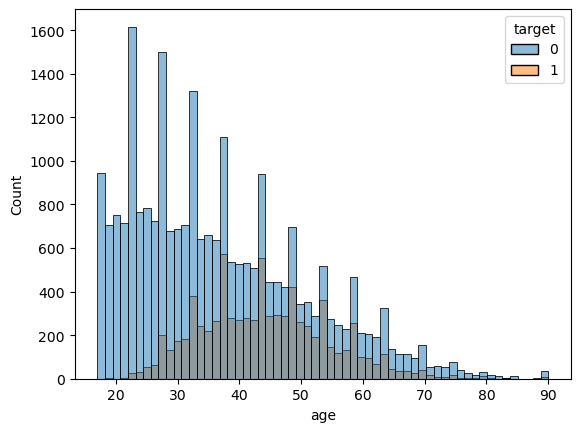

In [32]:
sns.histplot(adult, x="age", hue="target")
plt.show()

when age increase, incom does. so there is a positive relatrion between age and target.

hours-per-week

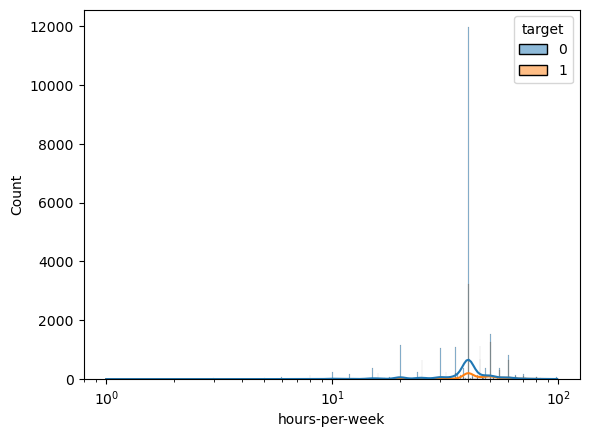

In [52]:
sns.histplot(adult, x="hours-per-week", hue="target", kde=True, log_scale=True)
plt.show()

40 hours per week is very common.

fnlwgt or final weight

<Axes: xlabel='fnlwgt', ylabel='Count'>

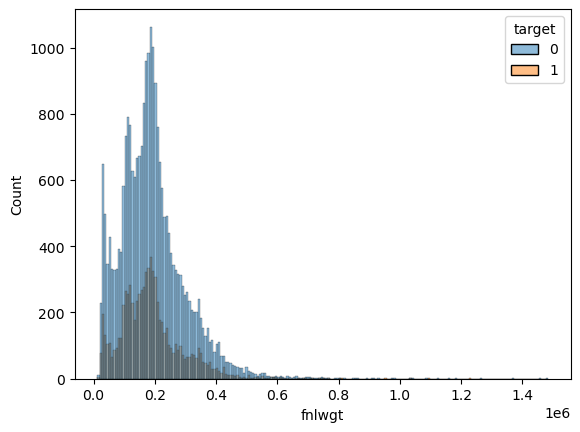

In [14]:
sns.histplot(adult, x="fnlwgt", hue="target")

In [57]:
adult.loc[adult["target"]==0,["fnlwgt"]].var()/adult.loc[adult["target"]==1,["fnlwgt"]].var()

fnlwgt    1.07817
dtype: float64

fnlwgt has similar variance for target classes which means it is not useful to make prediction.

### Discretization
discretize numerical features

n_bins or number of labels is a hyperparameter, we will conclude it from plotting (intuitive visualization) and testing

In [10]:
from sklearn.preprocessing import KBinsDiscretizer

adult_discretized: pd.DataFrame = pd.DataFrame()
edges: dict[str,np.ndarray] = dict()
n_bins: dict[str, int] = {
    "capital-gain":2, "capital-loss":2, "hours-per-week":8 }
for column in n_bins:
    transformer = KBinsDiscretizer(n_bins=n_bins[column], encode='ordinal', strategy='kmeans')
    adult_discretized[column] = transformer.fit_transform(adult[column].to_numpy().reshape(-1, 1)).reshape(-1,).astype(int)
    edges[column] = transformer.bin_edges_[0]
adult_discretized: pd.DataFrame = adult_discretized.astype("category")
adult_discretized.head()

,capital-gain,capital-loss,hours-per-week
0,0,0,3
1,0,0,0
2,0,0,3
3,0,0,3
4,0,0,3


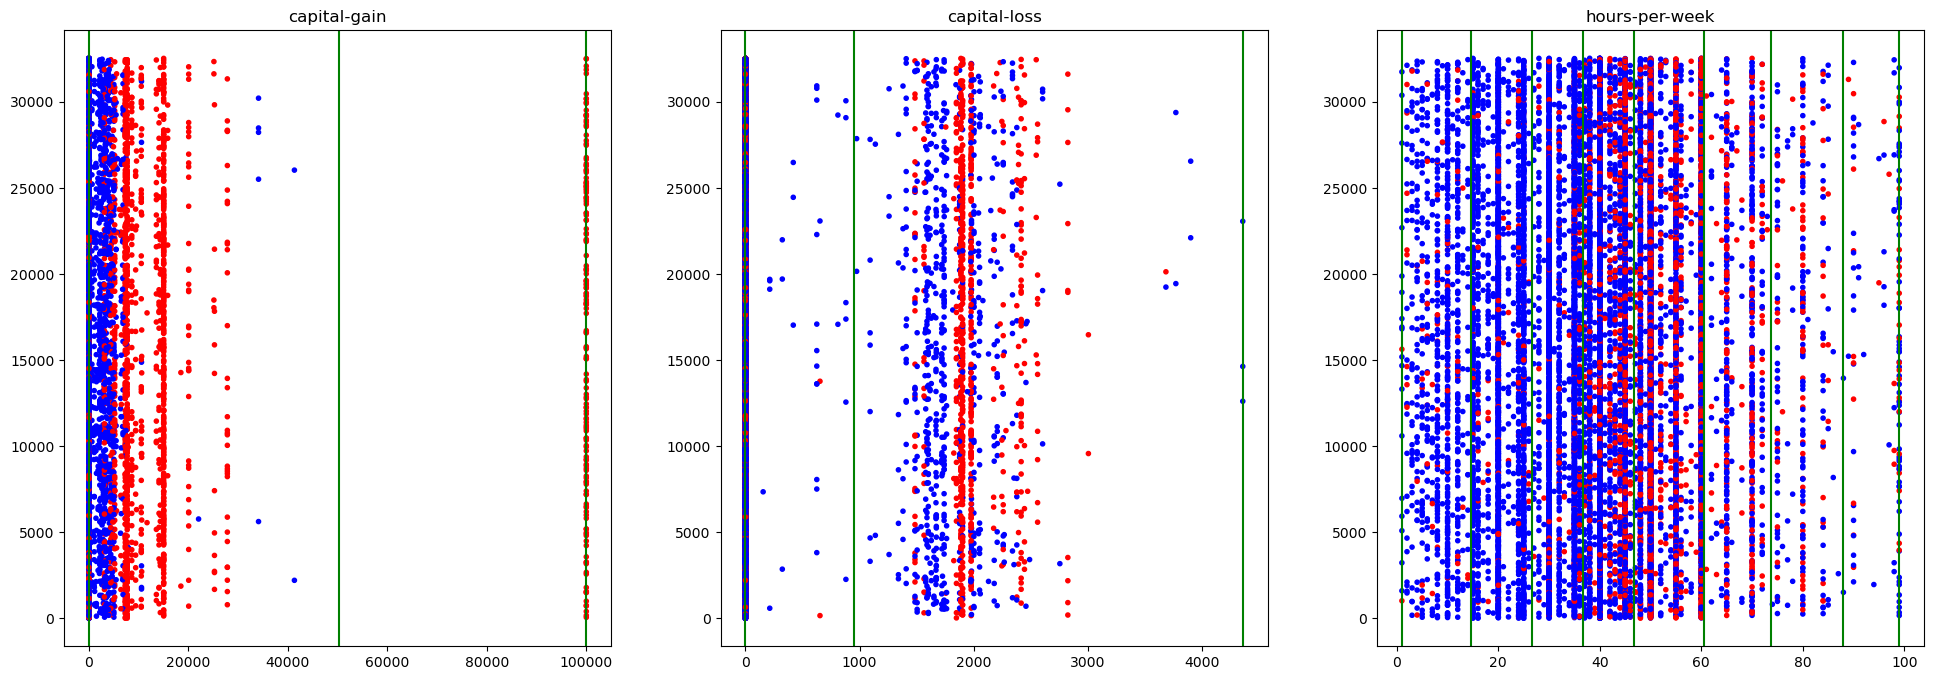

In [64]:
_,axs = plt.subplots(1,len(n_bins), figsize=(8*len(n_bins),8))
for ax,column in zip(axs.flat, n_bins):
    ax.scatter(adult[column],np.random.default_rng().choice(adult.shape[0], size=adult.shape[0], replace=False), color=adult["target"].replace({0: 'b', 1:'r'}), marker='.')
    ax.set_title(column)
    for edge in edges[column]:
        ax.axvline(x=edge, color='g', linestyle='-')
plt.show()

manual discretization based on target

In [109]:
adult.sort_values(by="capital-gain").loc[adult["target"]==1,"capital-gain"].quantile(0.7861)

1401.9353999994446

In [ ]:
adult_discretized["capital-gain"] = (adult["capital-gain"]<1400).astype(int)


In [106]:
# 
# adult.loc[adult["target"]==0,["capital-gain"]]


1401.9353999994446

### One Hot Encoding categorical and discretized features

In [11]:
# adult_ohe: pd.DataFrame = pd.concat([pd.get_dummies(adult[categorical]), 
#                                      pd.get_dummies(adult_discretized)], axis=1).astype(int)
adult_ohe: pd.DataFrame = pd.get_dummies(adult[categorical]).astype(int)
adult_ohe.drop(columns=["sex_Female"], inplace=True)
adult_ohe.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

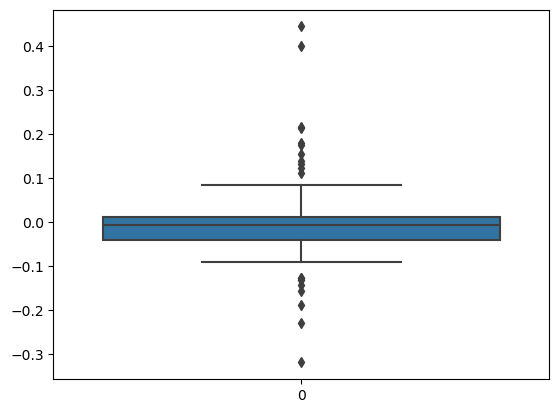

In [142]:
sns.boxplot(adult_ohe.corrwith(adult["target"]))

In [12]:
adult_discretized_ohe: pd.DataFrame = pd.get_dummies(adult_discretized).astype(int)
adult_discretized_ohe.drop(columns=["capital-gain_1","capital-loss_1"], inplace=True)
adult_discretized_ohe.head()

,capital-gain_0,capital-loss_0,hours-per-week_0,hours-per-week_1,hours-per-week_2,hours-per-week_3,hours-per-week_4,hours-per-week_5,hours-per-week_6,hours-per-week_7
0,1,1,0,0,0,1,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,0,0,0
3,1,1,0,0,0,1,0,0,0,0
4,1,1,0,0,0,1,0,0,0,0


### Eliminating sparse columns based on threshold

In [13]:
threshold: float = 0.05
adult_ohe_thr: pd.DataFrame = adult_ohe.drop(columns=adult_ohe.columns[adult_ohe.corrwith(adult["target"]).abs() < threshold])
adult_ohe_thr.head()

,workclass_Federal-gov,workclass_Private,workclass_Self-emp-inc,education_10th,education_11th,education_7th-8th,education_9th,education_Bachelors,education_Doctorate,education_HS-grad,...,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Black,race_White,sex_Male,native-country_Mexico
0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0
2,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,1,0
3,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0


In [14]:
threshold: float = 0.032*adult_ohe.shape[0]
adult_ohe_thr: pd.DataFrame = adult_ohe.drop(columns=adult_ohe.columns[adult_ohe.sum() < threshold])
print(adult_ohe.shape[0], threshold)
adult_ohe_thr.head()

32537 1041.184


,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,education_11th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_HS-grad,...,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Black,race_White,sex_Male,native-country_United-States
0,0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,1,1
1,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,1,1
2,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,1
3,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,1
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0


### Scaling for Numerical
StandardScaler

In [15]:
from sklearn.preprocessing import StandardScaler

adult_ss = pd.DataFrame(StandardScaler().fit_transform(adult[numerical]), columns=numerical)
adult_ss.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,3.253700e+04,3.253700e+04,3.253700e+04,3.253700e+04,3.253700e+04,3.253700e+04
mean,-7.555945e-17,-1.255685e-16,2.849858e-17,3.646945e-17,4.367598e-19,-6.485884e-17
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.582777e+00,-1.681551e+00,-3.531590e+00,-1.459754e-01,-2.167432e-01,-3.194403e+00
25%,-7.761933e-01,-6.816726e-01,-4.206787e-01,-1.459754e-01,-2.167432e-01,-3.566374e-02
50%,-1.162616e-01,-1.082361e-01,-3.181473e-02,-1.459754e-01,-2.167432e-01,-3.566374e-02
75%,6.903217e-01,4.472760e-01,7.459132e-01,-1.459754e-01,-2.167432e-01,3.693028e-01
max,3.770003e+00,1.226778e+01,2.301369e+00,1.338964e+01,1.058963e+01,4.742941e+00


### Polynomial Features

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

adult_poly = pd.DataFrame(StandardScaler().fit_transform(PolynomialFeatures(3).fit_transform(adult[numerical])))
# adult_poly = pd.DataFrame(PolynomialFeatures(2).fit_transform(adult_ss))
adult_poly.columns = adult_poly.columns.astype(str)
adult_poly.describe()

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
count,32537.0,3.253700e+04,3.253700e+04,3.253700e+04,3.253700e+04,3.253700e+04,3.253700e+04,3.253700e+04,3.253700e+04,3.253700e+04,...,3.253700e+04,32537.0,3.253700e+04,32537.0,32537.0,3.253700e+04,3.253700e+04,3.253700e+04,3.253700e+04,3.253700e+04
mean,0.0,-7.206537e-17,-1.246949e-16,6.474965e-17,1.026386e-17,-4.913548e-17,-5.262956e-17,6.988157e-17,-7.359403e-17,1.511189e-16,...,6.088432e-16,0.0,5.241118e-18,0.0,0.0,-2.074609e-17,4.760682e-17,1.004548e-17,-1.528659e-17,-3.057319e-17
std,0.0,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,...,1.000015e+00,0.0,1.000015e+00,0.0,0.0,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,0.0,-1.582777e+00,-1.681551e+00,-3.531590e+00,-1.459754e-01,-2.167432e-01,-3.194403e+00,-1.175769e+00,-1.470266e+00,-2.106486e+00,...,-7.164301e-02,0.0,-7.660216e-02,0.0,0.0,-1.195063e-01,-1.736378e-01,-1.955056e-01,-1.845414e-01,-9.500044e-01
25%,0.0,-7.761933e-01,-6.816726e-01,-4.206787e-01,-1.459754e-01,-2.167432e-01,-3.566374e-02,-7.558007e-01,-6.848763e-01,-7.448376e-01,...,-7.164301e-02,0.0,-7.660216e-02,0.0,0.0,-1.195063e-01,-1.736378e-01,-1.955056e-01,-1.845414e-01,-2.352291e-01
50%,0.0,-1.162616e-01,-1.082361e-01,-3.181473e-02,-1.459754e-01,-2.167432e-01,-3.566374e-02,-2.594752e-01,-1.880435e-01,-1.491162e-01,...,-7.164301e-02,0.0,-7.660216e-02,0.0,0.0,-1.195063e-01,-1.736378e-01,-1.955056e-01,-1.845414e-01,-2.352291e-01
75%,0.0,6.903217e-01,4.472760e-01,7.459132e-01,-1.459754e-01,-2.167432e-01,3.693028e-01,5.337973e-01,4.558188e-01,5.941172e-01,...,-7.164301e-02,0.0,-7.660216e-02,0.0,0.0,-1.195063e-01,-1.736378e-01,-1.955056e-01,-1.845414e-01,6.771751e-02
max,0.0,3.770003e+00,1.226778e+01,2.301369e+00,1.338964e+01,1.058963e+01,4.742941e+00,5.451238e+00,1.155298e+01,5.444991e+00,...,1.426806e+01,0.0,2.224676e+01,0.0,0.0,2.982472e+01,4.154060e+01,1.977330e+01,2.423129e+01,9.886806e+00


In [17]:
from sklearn.metrics import roc_curve, auc

def roc_curve_plot(model, X_test, y_test):
    
    roc_curve_ = roc_curve(y_test ,model.decision_function(X_test))
    roc_auc_ = auc(*roc_curve_[:2])

    plt.figure()
    plt.xlim([0.0, 1.00])
    plt.ylim([0.0, 1.05])
    plt.plot(*roc_curve_[:2], lw=2, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve (area = {:0.2f})'.format(roc_auc_), fontsize=16)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

## Feature Selection

numerical selecting

In [18]:
ss_selected: list[str] = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
ss_selected, adult_ss.columns

(['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'],
 Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
        'hours-per-week'],
       dtype='object'))

ohe selecting

In [40]:
categorical

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [54]:
# ohe_selected: list[str] = adult_ohe.columns[:51].to_list() # remove [51:] [race, sex, native-country]
cat_eliminated: list[str] = []#["sex", "race", "native-country", "education"]
ohe_selected: list[str] = [col for col in adult_ohe.columns if not col.startswith(tuple(cat_eliminated))]
print(ohe_selected)

['workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital-status_Divorced', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service'

In [55]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

ohe_selected = np.array(ohe_selected)[SelectKBest(mutual_info_classif, k=25).fit(adult_ohe[ohe_selected], adult["target"]).get_support()]
ohe_selected

array(['workclass_Private', 'workclass_Self-emp-inc', 'education_11th',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Prof-school',
       'marital-status_Divorced', 'marital-status_Married-civ-spouse',
       'marital-status_Never-married', 'occupation_Adm-clerical',
       'occupation_Exec-managerial', 'occupation_Other-service',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Own-child', 'relationship_Unmarried',
       'relationship_Wife', 'race_Black', 'race_White', 'sex_Male',
       'native-country_El-Salvador', 'native-country_Mexico',
       'native-country_United-States'], dtype='<U41')

'workclass_Federal-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_State-gov',
       'marital-status_Divorced', 'marital-status_Married-civ-spouse',
       'marital-status_Never-married', 'marital-status_Separated',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Other-service',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Transport-moving',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife', 'sex_Male'

all features

In [45]:
features: pd.DataFrame = pd.concat([
    adult_ss[ss_selected], 
    adult_ohe[ohe_selected]#_thr[adult_ohe_thr.columns[:29]] # ohe thr 3.2% - sex, race, native-country, discretized     
    # , adult_discretized["capital-gain"]
    ,(adult["capital-gain"]==0).astype(int)], axis=1)
# features: pd.DataFrame = pd.concat([adult_poly, adult_ohe[list(adult_ohe.columns[:51])+["sex_Female", "sex_Male"]]], axis=1)
# features: pd.DataFrame = pd.concat([adult_poly, adult_ohe_thr], axis=1)
features.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,capital-gain
0,0.030390,1.134777,0.148292,-0.216743,-0.035664,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.836973,1.134777,-0.145975,-0.216743,-2.222483,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,-0.042936,-0.420679,-0.145975,-0.216743,-0.035664,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,1.056950,-1.198407,-0.145975,-0.216743,-0.035664,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,-0.776193,1.134777,-0.145975,-0.216743,-0.035664,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1


In [46]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

features_selected: pd.Index = features.columns[SelectKBest(mutual_info_classif, k=31).fit(features, adult["target"]).get_support()]
features.drop(columns=list(set(features.columns)-set(features_selected)), inplace=True)
features_selected

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-civ-spouse',
       'marital-status_Never-married', 'marital-status_Separated',
       'marital-status_Widowed', 'occupation_Adm-clerical',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Transport-moving',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife', 'capital-gain'],
      dtype='object')

# Training

In [ ]:
import mlflow

mlflow.set_tracking_uri("sqlite:///adult.db")
mlflow.set_experiment("adult")

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat_pipeline = Pipeline(steps=[
    ("si", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(sparse_output=False))
    ])
num_pipeline = Pipeline(steps=[
    ("ss", StandardScaler())
    ])
# manual selection
cat: list[str] = [
    'workclass',
    # 'education',
    'marital-status',
    'occupation',
    'relationship',
    # 'race',
    # 'sex',
    # 'native-country'
    ]
num: list[str] = [
    'age',
    # 'fnlwgt',
    'education-num',
    'capital-gain',
    'capital-loss',
    'hours-per-week']

clf: ColumnTransformer = ColumnTransformer(transformers=
    [("num", num_pipeline, num),
     ("cat", cat_pipeline, cat)
     ]).fit(adult[cat+num])
features = clf.transform(adult[cat+num])
clf.get_feature_names_out()

('cat',
 Pipeline(steps=[('si', SimpleImputer(strategy='most_frequent')),
                 ('onehot', OneHotEncoder(sparse_output=False))]),
 ['workclass',
  'education',
  'marital-status',
  'occupation',
  'relationship',
  'race',
  'sex',
  'native-country'])

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, adult["target"], random_state=0)
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((24402, 31), (8135, 31), (24402,), (8135,))

### Dummy most frequent Classifier

0.7531653349723417

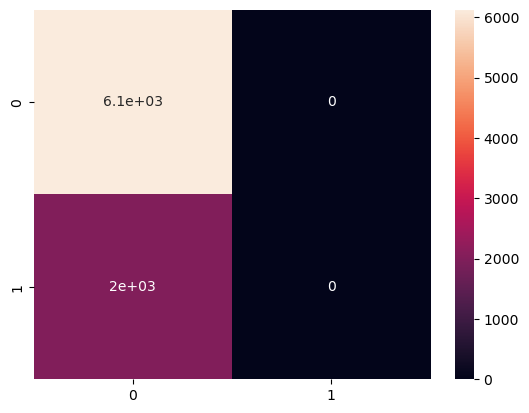

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

from sklearn.dummy import DummyClassifier

dummy_majority: DummyClassifier = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, dummy_majority.predict(X_test)), annot=True)
# print(classification_report(y_test, dummy_majority.predict(X_test), target_names=np.unique(y_test)))#nursery_ohe.nursery.cat.categories))
dummy_majority.score(X_test, y_test)

### LogisticRegression

[[5742  385]
 [ 817 1191]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6127
           1       0.76      0.59      0.66      2008

    accuracy                           0.85      8135
   macro avg       0.82      0.77      0.78      8135
weighted avg       0.85      0.85      0.85      8135



0.8522433927473878

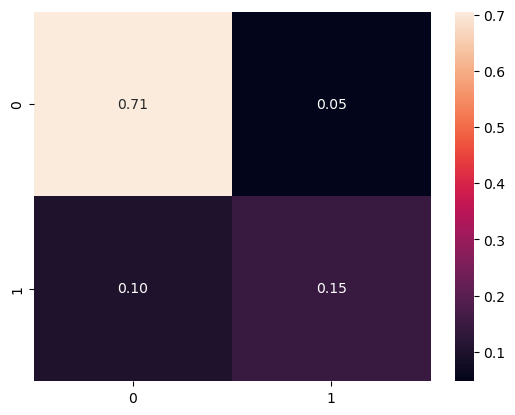

In [49]:
from sklearn.linear_model import LogisticRegression

lr: LogisticRegression = LogisticRegression(max_iter=1000, C=1).fit(X_train, y_train)
y_pred: np.ndarray = lr.predict(X_test)
cm: np.ndarray = confusion_matrix(y_test, y_pred)
sns.heatmap(cm/cm.sum(), annot=True, fmt='.2f')
print(cm)
print(classification_report(y_test, y_pred))
lr.score(X_test, y_test)

 numerical - (fnlwgt, capital-gain) + ohe cat - (sex, nat..,race, edu) + dicretized (capital-gain 2bins kmean) 40features     
 [[5707  420]       
 [ 960 1048]]       
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      6127
           1       0.71      0.52      0.60      2008       
0.8303626306084819

numerical - (fnlwgt) + ohe cat - (sex, nat..,race, edu) 40features      
[[5767  360]        
 [ 857 1151]]       
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      6127
           1       0.76      0.57      0.65      2008       
0.85039950829748

numerical + ohe cat+dis(numerical) thr 0.29. 139 features      
[[5728  431]
 [ 766 1216]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6159
           1       0.74      0.61      0.67      1982       

0.8529664660361135

numerical + ohe cat+dis thr 0.01       
[[5740  419]
 [ 790 1192]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6159
           1       0.74      0.60      0.66      1982    
0.8514924456454981

[[5730  429]
 [ 798 1184]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6159
           1       0.73      0.60      0.66      1982       
0.849281415059575

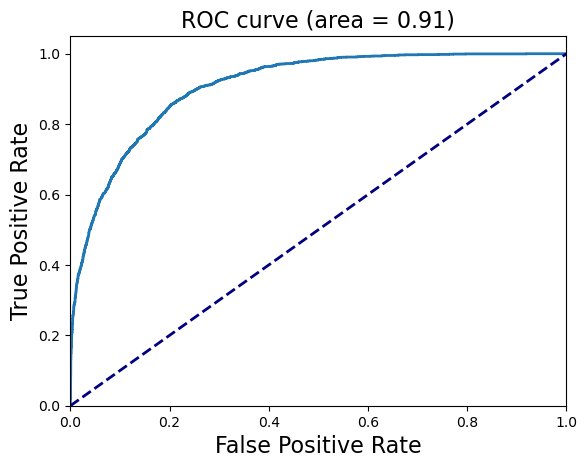

In [50]:
roc_curve_plot(lr,X_test, y_test)
plt.show()

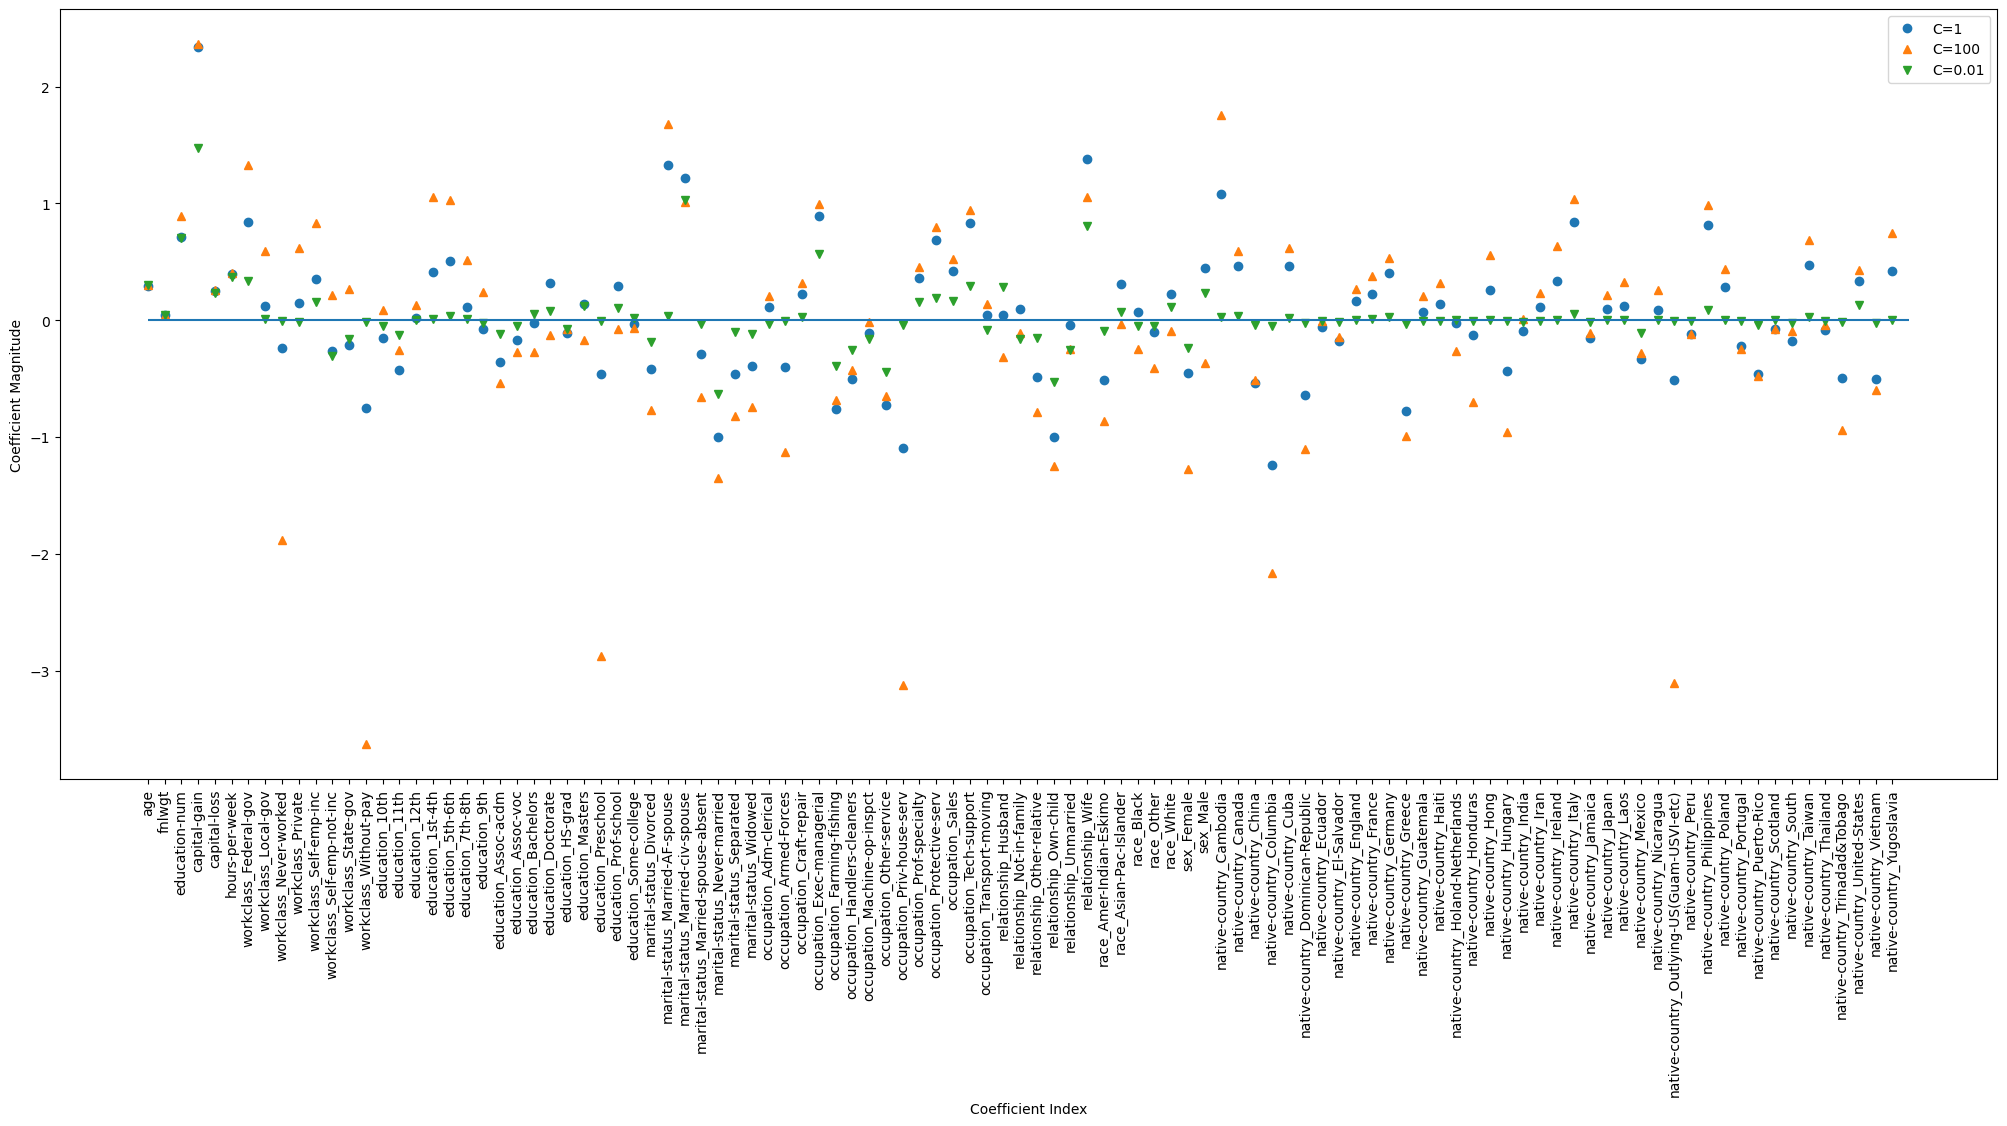

In [ ]:
plt.figure(figsize=(25, 10))
plt.plot(LogisticRegression(max_iter=1000, C= 1).fit(X_train, y_train).coef_.T, 'o', label='C=1')
plt.plot(LogisticRegression(max_iter=1000, C= 100).fit(X_train, y_train).coef_.T, '^', label='C=100')
plt.plot(LogisticRegression(max_iter=1000, C= 0.01).fit(X_train, y_train).coef_.T, 'v', label='C=0.01')
plt.xticks(range(features.shape[1]), features.columns, rotation=90)
plt.hlines(0,0, features.shape[1])
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend()

### KNeighborsClassifier

In [210]:
from sklearn.neighbors import KNeighborsClassifier

knn: KNeighborsClassifier = KNeighborsClassifier(n_neighbors= 25).fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
knn.score(X_test, y_test)

2023/06/15 14:59:25 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '476f043b4c5a4c58b5f791f6f67c62db', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/06/15 14:59:26 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\VISION\miniconda3\envs\ml\Lib\site-packages\mlflow\data\pandas_dataset.py:116: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Mi

[[5631  496]
 [ 768 1240]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6127
           1       0.71      0.62      0.66      2008

    accuracy                           0.84      8135
   macro avg       0.80      0.77      0.78      8135
weighted avg       0.84      0.84      0.84      8135



0.8446220036877689

numerical - (fnlwgt) ohe cat - (sex, race, native-country, education) 5+35=40features       
 [[5700  427]       
 [ 730 1278]]       
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6127
           1       0.75      0.64      0.69      2008       
0.8577750460971112

numerical - (fnlwgt) ohe cat - (sex, race, native-country) k=20         
[[5699  428]        
 [ 759 1249]]       
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      6127
        >50K       0.74      0.62      0.68      2008           
0.8540872771972956

numerical + ohe cat+dis thr 0.01        
[[5648  511]
 [ 736 1246]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6159
           1       0.71      0.63      0.67      1982

    accuracy                           0.85      8141
    macro avg       0.80      0.77      0.78      8141
    weighted avg       0.84      0.85      0.84      8141

0.8468247144085493

### Decision Tree

In [211]:
from sklearn.tree import DecisionTreeClassifier

dtc: DecisionTreeClassifier = DecisionTreeClassifier(max_depth= 5).fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
dtc.score(X_test, y_test)

2023/06/15 15:00:54 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '9f13046cf1694320833013ad445f0158', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/06/15 15:00:54 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\VISION\miniconda3\envs\ml\Lib\site-packages\mlflow\data\pandas_dataset.py:116: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Mi

[[5848  279]
 [1159  849]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      6127
           1       0.75      0.42      0.54      2008

    accuracy                           0.82      8135
   macro avg       0.79      0.69      0.72      8135
weighted avg       0.81      0.82      0.80      8135



0.8232329440688384

numerical - (fnlwgt) ohe cat - (sex, race, native-country, education) 5+35=40features       
 [[5853  274]       
 [ 904 1104]]       
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      6127
           1       0.80      0.55      0.65      2008       
0.8551936078672403

numerical - (fnlwgt) ohe cat - (sex, race, native-country) k=20     
[[5853  274]        
 [ 903 1105]]       
              precision    recall  f1-score   support

       <=50K       0.87      0.96      0.91      6127
        >50K       0.80      0.55      0.65      2008       
0.8553165334972341

### SVM

In [ ]:
from sklearn.svm import SVC

svm: SVC = SVC(gamma=1).fit(X_train, y_train)
y_predicted = svm.predict(X_test)
print(confusion_matrix(y_test, y_predicted))
print(classification_report(y_test, y_predicted))
svm.score(X_test, y_test)

In [ ]:
roc_curve_plot(svm,X_test, y_test)
plt.show()

### Ensemble GradientBoostingClassifier

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

gbc: GradientBoostingClassifier = GradientBoostingClassifier(max_depth=4, n_estimators=250, learning_rate=0.1, random_state=0).fit(X_train, y_train)
y_pred = gbc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
gbc.score(X_test, y_test)

[[5778  349]
 [ 664 1344]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6127
           1       0.79      0.67      0.73      2008

    accuracy                           0.88      8135
   macro avg       0.85      0.81      0.82      8135
weighted avg       0.87      0.88      0.87      8135



0.8754763368162262

numerical - (fnlwgt) ohe cat - (sex, race, native-country, education) 5+35=40features depth=4, est=250       
[[5783  344]        
 [ 662 1346]]       
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6127
           1       0.80      0.67      0.73      2008       
0.8763368162261832

numerical - (fnlwgt) ohe cat - (sex, race, native-country) k=20 depth=4, est=250         
[[5772  355]    
 [ 677 1331]]   
              precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92      6127
        >50K       0.79      0.66      0.72      2008   
0.8731407498463429

numerical + ohe cat-(rece+native-country). 59 features      
[[5745  414]    
 [ 675 1307]]  
                precision    recall  f1-score   support

           0       0.89      0.93      0.91      6159
           1       0.76      0.66      0.71      1982       
auc: 0.93      
0.8662326495516521

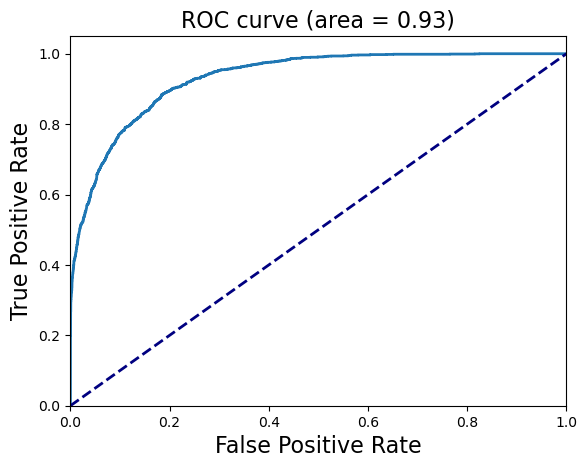

In [53]:
roc_curve_plot(gbc,X_test, y_test)
plt.show()

In [196]:
from sklearn.ensemble import RandomForestClassifier

rfc: RandomForestClassifier = RandomForestClassifier(n_estimators=250).fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
rfc.score(X_test, y_test)

2023/06/15 14:41:57 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '8cc479bb58cd440c998420dc48053f8f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/06/15 14:41:57 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\VISION\miniconda3\envs\ml\Lib\site-packages\mlflow\data\pandas_dataset.py:116: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Mi

[[5639  488]
 [ 736 1272]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6127
           1       0.72      0.63      0.68      2008

    accuracy                           0.85      8135
   macro avg       0.80      0.78      0.79      8135
weighted avg       0.84      0.85      0.85      8135



0.8495390288875231

numerical - (fnlwgt) ohe cat - (sex, race, native-country) k=20     
[[5622  505]
 [ 767 1241]]
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      6127
        >50K       0.71      0.62      0.66      2008

    accuracy                           0.84      8135
   macro avg       0.80      0.77      0.78      8135
weighted avg       0.84      0.84      0.84      8135

0.8436385986478181

numerical + ohe cat-(rece+native-country). 59 features    
[[5696  463]        
 [ 750 1232]]       
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6159
           1       0.73      0.62      0.67      1982       
0.851001105515293

### Grid Search Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Your code here
param_grid = {
    "polynomialfeatures__degree": [1, 2, 3],
    "logisticregression__C": [0.01, 1],
    "logisticregression__max_iter": [1000]
}
pipe = make_pipeline(PolynomialFeatures(), LogisticRegression(solver='newton-cg'))
grid = GridSearchCV(pipe, param_grid=param_grid, cv=3)
grid.fit(X_train, y_train)

print('Grid best parameter (max. Accuracy): ', grid.best_params_)
print('Grid best score (Accuarcy): ', grid.best_score_)

grid = GridSearchCV(pipe, param_grid, scoring = 'roc_auc')
grid.fit(X_train, y_train)
roc_curve_plot(grid, X_test, y_test)